In [1]:
import matplotlib
from matplotlib import pylab
import pandas as pd

cols = ['Season', 'TeamID', 'Wins', 'Losses', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'PFPG', 'TOPG']
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

temp_df = pd.read_csv("./MRegularSeasonDetailedResults.csv",
                    names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")

tourney_temp_df = pd.read_csv("./MNCAATourneyDetailedResults.csv",
                        names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                        encoding = "ISO-8859-1")

reg_season_df = temp_df.drop(labels=0, axis=0)
tourney_df = tourney_temp_df.drop(labels=0, axis=0)

team_avgs = pd.DataFrame(columns=cols)
reg_season_df['Season'] = pd.to_numeric(reg_season_df['Season'])
tourney_df['Season'] = pd.to_numeric(tourney_df['Season'])

for year in years:
    year_df = reg_season_df[reg_season_df['Season'] == year]
    tourney_year_df = tourney_df[tourney_df['Season'] == year]
    dict = {}
    for index, row in tourney_year_df.iterrows():
        #print(row['WTeamID'])
        dict[int(row['WTeamID'])] = 1
        dict[int(row['LTeamID'])] = 1
    
    for key in dict:
        team_1211W = year_df[year_df['WTeamID'].apply(pd.to_numeric) == key]
        team_1211L = year_df[year_df['LTeamID'].apply(pd.to_numeric) == key]
        
        #print(f"key: ", key)
        #print(f"year: ", year)
        #print(f"w_df: ", team_1211W)
        #print(f"l_df: ", team_1211L)
    
        team_1211_Wdf = team_1211W[['Season', 'WTeamID', 'WScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].apply(pd.to_numeric)
        team_1211_Ldf = team_1211L[['Season', 'LTeamID', 'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].apply(pd.to_numeric)


        
        w_sum = team_1211_Wdf.sum(axis=0, numeric_only=True)
        
        l_sum = {'Season': 0, 'LTeamID': 0, 'LScore': 0, 'LFGM': 0, 'LFGA': 0, 'LFGM3': 0, 'LFGA3': 0, 'LFTM': 0, 'LFTA': 0, 'LOR': 0, 'LDR': 0, 'LAst': 0, 'LTO': 0, 'LStl': 0, 'LBlk': 0, 'LPF': 0}
        if not team_1211L.empty:
            l_sum = team_1211_Ldf.sum(axis=0, numeric_only=True)
        
        tot_games = (len(team_1211_Wdf.index) + len(team_1211_Ldf.index))

        #print(f"w_sum: ", w_sum)
        #print(f"l_sum: ", l_sum)
        season_total = (w_sum['Season'] + l_sum['Season']) / tot_games

        id_total = (w_sum['WTeamID'] + l_sum['LTeamID']) / tot_games
        score_total = (w_sum['WScore'] + l_sum['LScore']) / tot_games
        rebs_total = (w_sum['WOR'] + l_sum['LOR'] + w_sum['WDR'] + l_sum['LDR']) / tot_games
        ast_total = (w_sum['WAst'] + l_sum['LAst']) / tot_games
        stl_total = (w_sum['WStl'] + l_sum['LStl']) / tot_games
        blk_total = (w_sum['WBlk'] + l_sum['LBlk']) / tot_games
        pf_total = (w_sum['WPF'] + l_sum['LPF']) / tot_games
        to_total = (w_sum['WTO'] + l_sum['LTO']) / tot_games

        d = {'Season': [season_total], 'TeamID': [id_total], 'Wins': [len(team_1211_Wdf.index)], 'Losses': [len(team_1211_Ldf.index)], 'PPG': [score_total], 'RPG': [rebs_total], 'APG': [ast_total], 'SPG': [stl_total], 'BPG': [blk_total], 'PFPG': [pf_total], 'TOPG': [to_total]}
        #temp_df = pd.DataFrame(data=d)
        team_avgs.loc[len(team_avgs.index)] = [season_total, id_total, len(team_1211_Wdf.index), len(team_1211_Ldf.index), score_total, rebs_total, ast_total, stl_total, blk_total, pf_total, to_total]
        #print(rows)

team_avgs

    

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Season,TeamID,Wins,Losses,PPG,RPG,APG,SPG,BPG,PFPG,TOPG
0,2006.0,1284.0,18.0,14.0,64.843750,32.656250,14.656250,7.656250,3.437500,16.937500,15.093750
1,2006.0,1214.0,16.0,15.0,66.806452,39.225806,12.354839,7.645161,3.064516,20.870968,16.225806
2,2006.0,1104.0,17.0,12.0,69.965517,37.000000,12.206897,6.344828,5.034483,13.827586,13.517241
3,2006.0,1266.0,19.0,10.0,74.206897,35.551724,15.275862,7.517241,3.068966,19.482759,14.793103
4,2006.0,1130.0,25.0,7.0,74.531250,35.187500,17.812500,5.937500,4.281250,16.500000,13.312500
...,...,...,...,...,...,...,...,...,...,...,...
932,2019.0,1205.0,20.0,11.0,75.774194,32.870968,13.612903,6.225806,2.483871,16.193548,11.774194
933,2019.0,1439.0,24.0,8.0,74.000000,32.593750,15.343750,6.656250,2.312500,15.281250,11.375000
934,2019.0,1387.0,23.0,12.0,67.057143,39.771429,12.971429,7.085714,4.057143,17.485714,12.714286
935,2019.0,1449.0,26.0,8.0,69.823529,31.588235,11.676471,9.000000,5.735294,18.411765,13.352941


In [39]:
import random

random.seed()

# make a new empty dataframe to hold all of the data

# note: "Winner" column will always be '1' because the winning team is always listed first;
# it's included just for a classification metric for the machine learning
train_cols = ["Season", "Team1ID", "Team2ID", "Winner", "Team1W", "Team1L", "Team1PPG", "Team1RPG", "Team1APG", "Team1SPG", \
              "Team1BPG", "Team1PFPG", "Team1TOPG", "Team2W", "Team2L", "Team2PPG", "Team2RPG", "Team2APG", "Team2SPG",\
              "Team2BPG", "Team2PFPG", "Team2TOPG"]

train_DF = pd.DataFrame(columns=train_cols)

# we just need three columns from our tourney_df
trim_tourney_df = tourney_df[["Season", "WTeamID", "LTeamID"]]
trim_tourney_df

for year in years:
    avg_year_df = team_avgs[team_avgs['Season'] == year]
    tourney_year_df = trim_tourney_df[trim_tourney_df['Season'] == year].apply(pd.to_numeric)
    
    for index, row in tourney_year_df.iterrows():
        # make a list that we can insert into the new dataframe
        #first 4 values (last value is the "Winner" classification which is randomly chosen)
        
        #randomly choose which slot the winning team goes into
        winning_team = random.randint(1,2)
        losing_team = 2 if winning_team == 1 else 1
        
        #properly put winning team into correct row
        team_id = ["", "WTeamID", "LTeamID"]
        temp_list = [year, row[team_id[winning_team]], row[team_id[losing_team]], winning_team]
        team1_row = avg_year_df[avg_year_df["TeamID"] == temp_list[1]][cols[2:]].values.tolist()
        team2_row = avg_year_df[avg_year_df["TeamID"] == temp_list[2]][cols[2:]].values.tolist()
        temp_list.extend(team1_row[0])
        temp_list.extend(team2_row[0])
        
        # add that list to our DF
        temp_series = pd.Series(temp_list, index=train_cols)
        train_DF = train_DF.append(temp_series, ignore_index=True)

test_data = train_DF[train_DF['Season'] == 2019]
test_labels = test_data['Winner']
test_data = test_data.drop(columns=['Winner'])

train_data = train_DF[train_DF['Season'] != 2019]
train_labels = train_data['Winner']
train_data = train_data.drop(columns=['Winner'])


train_DF
#train_data
        
        

    

,Season,Team1ID,Team2ID,Winner,Team1W,Team1L,Team1PPG,Team1RPG,Team1APG,Team1SPG,...,Team1TOPG,Team2W,Team2L,Team2PPG,Team2RPG,Team2APG,Team2SPG,Team2BPG,Team2PFPG,Team2TOPG
0,2006.0,1284.0,1214.0,1.0,18.0,14.0,64.843750,32.656250,14.656250,7.656250,...,15.093750,16.0,15.0,66.806452,39.225806,12.354839,7.645161,3.064516,20.870968,16.225806
1,2006.0,1266.0,1104.0,2.0,19.0,10.0,74.206897,35.551724,15.275862,7.517241,...,14.793103,17.0,12.0,69.965517,37.000000,12.206897,6.344828,5.034483,13.827586,13.517241
2,2006.0,1130.0,1334.0,1.0,25.0,7.0,74.531250,35.187500,17.812500,5.937500,...,13.312500,22.0,7.0,73.724138,35.172414,15.655172,5.931034,2.103448,15.379310,12.551724
3,2006.0,1181.0,1380.0,1.0,30.0,3.0,82.515152,32.909091,15.363636,9.545455,...,13.393939,19.0,12.0,65.774194,38.806452,12.354839,7.580645,3.806452,17.870968,17.580645
4,2006.0,1375.0,1196.0,2.0,23.0,6.0,74.103448,33.931034,14.172414,8.482759,...,13.241379,27.0,6.0,79.272727,35.242424,17.030303,8.030303,4.939394,16.121212,14.878788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,2019.0,1120.0,1246.0,1.0,25.0,9.0,78.882353,33.676471,14.411765,9.294118,...,12.147059,27.0,6.0,76.727273,38.424242,13.848485,6.030303,5.060606,16.303030,12.636364
919,2019.0,1277.0,1181.0,1.0,28.0,6.0,78.823529,40.911765,18.941176,5.235294,...,12.852941,29.0,5.0,83.500000,41.764706,15.911765,9.470588,6.823529,15.852941,13.117647
920,2019.0,1277.0,1403.0,2.0,28.0,6.0,78.823529,40.911765,18.941176,5.235294,...,12.852941,26.0,6.0,73.093750,34.281250,14.031250,7.375000,4.906250,17.781250,12.375000
921,2019.0,1120.0,1438.0,2.0,25.0,9.0,78.882353,33.676471,14.411765,9.294118,...,12.147059,29.0,3.0,71.843750,34.625000,14.500000,5.625000,3.812500,14.656250,9.031250


In [3]:
reg_2022_df = pd.read_csv("./2022RegularSeason.csv",
                    names=['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
                    #dtype={'Season': 'str', 'DayNum': 'str', 'WTeamID': 'str', 'WScore': 'int', 'LTeamID': 'str', 'LScore': 'int', 'WLoc': 'str', 'NumOT': 'str', 'WFGM': 'int', 'WFGA': 'int', 'WFGM3': 'int', 'WFGA3': 'int', 'WFTM': 'int', 'WFTA': 'int', 'WOR': 'int', 'WDR': 'int', 'WAst': 'int', 'WTO': 'int', 'WStl': 'int', 'WBlk': 'int', 'WPF': 'int', 'LFGM': 'int', 'LFGA': 'int', 'LFGM3': 'int', 'LFGA3': 'int', 'LFTM': 'int', 'LFTA': 'int', 'LOR': 'int', 'LDR': 'int', 'LAst': 'int', 'LTO': 'int', 'LStl': 'int', 'LBlk': 'int', 'LPF': 'int'},
                    encoding = "ISO-8859-1")
reg_2022_df = reg_2022_df.drop(labels=0, axis=0)
tourney_team_ids = [1211, 1112,1242,1124, 1120, 1246,1437, 1181, 1458, 1397,1345,1403,1417, 1228, 1344, 1116, 1163, 1222, 1388, 1234, 1104, 1261, 1400, 1161, 1425, 1293,1277, 1326, 1129, 1314, 1361,1371, 1166, 1395, 1266, 1272, 1362, 1274, 1260, 1172,1235, 1276,1461,1353,1231, 1439, 1323,1412,1350,1308,1151, 1355, 1436,1103, 1255,1463, 1159, 1286, 1174,1389,1240,1168,1209, 1313, 1460, 1136,1411, 1394]
team_avgs_2022 = pd.DataFrame(columns=cols)

for key in tourney_team_ids:
    team_wins = reg_2022_df[reg_2022_df['WTeamID'] == str(key)]
    team_losses = reg_2022_df[reg_2022_df['LTeamID'] == str(key)]
    
    team_win_df = team_wins[['Season', 'WTeamID', 'WScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']].apply(pd.to_numeric)
    team_loss_df = team_losses[['Season', 'LTeamID', 'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']].apply(pd.to_numeric)

    w_sum = team_win_df.sum(axis=0, numeric_only=True)

    l_sum = {'Season': 0, 'LTeamID': 0, 'LScore': 0, 'LFGM': 0, 'LFGA': 0, 'LFGM3': 0, 'LFGA3': 0, 'LFTM': 0, 'LFTA': 0, 'LOR': 0, 'LDR': 0, 'LAst': 0, 'LTO': 0, 'LStl': 0, 'LBlk': 0, 'LPF': 0}
    if not team_losses.empty:
        l_sum = team_loss_df.sum(axis=0, numeric_only=True)

    tot_games = (len(team_win_df.index) + len(team_loss_df.index))
    season_total = (int(w_sum['Season']) + int(l_sum['Season'])) / tot_games
    id_total = (w_sum['WTeamID'] + l_sum['LTeamID']) / tot_games
    score_total = (w_sum['WScore'] + l_sum['LScore']) / tot_games
    rebs_total = (w_sum['WOR'] + l_sum['LOR'] + w_sum['WDR'] + l_sum['LDR']) / tot_games
    ast_total = (w_sum['WAst'] + l_sum['LAst']) / tot_games
    stl_total = (w_sum['WStl'] + l_sum['LStl']) / tot_games
    blk_total = (w_sum['WBlk'] + l_sum['LBlk']) / tot_games
    pf_total = (w_sum['WPF'] + l_sum['LPF']) / tot_games
    to_total = (w_sum['WTO'] + l_sum['LTO']) / tot_games
       
    team_avgs_2022.loc[len(team_avgs_2022.index)] = [season_total, id_total, len(team_win_df.index), len(team_loss_df.index), score_total, rebs_total, ast_total, stl_total, blk_total, pf_total, to_total]
team_avgs_2022


,Season,TeamID,Wins,Losses,PPG,RPG,APG,SPG,BPG,PFPG,TOPG
0,2022.0,1211.0,26.0,3.0,87.827586,41.482759,18.206897,6.655172,5.862069,15.413793,11.758621
1,2022.0,1112.0,31.0,3.0,84.558824,41.352941,19.911765,6.705882,5.705882,16.470588,13.176471
2,2022.0,1242.0,28.0,6.0,78.588235,37.352941,15.441176,6.411765,4.147059,15.911765,12.500000
3,2022.0,1124.0,26.0,6.0,76.500000,37.125000,15.843750,8.812500,3.406250,15.843750,12.500000
4,2022.0,1120.0,27.0,5.0,78.718750,39.937500,14.593750,8.781250,7.937500,18.562500,12.093750
...,...,...,...,...,...,...,...,...,...,...,...
63,2022.0,1313.0,24.0,6.0,75.100000,38.766667,12.633333,6.700000,3.666667,17.666667,14.000000
64,2022.0,1460.0,21.0,13.0,75.470588,34.882353,13.941176,5.764706,2.941176,14.382353,12.294118
65,2022.0,1136.0,22.0,9.0,77.903226,41.548387,14.096774,6.322581,4.451613,16.806452,13.903226
66,2022.0,1411.0,18.0,12.0,69.233333,39.533333,10.833333,5.566667,5.000000,17.800000,14.933333


In [ ]:
#d = {'Team1ID': [1211,1129,1163,1116,1104,1403,1277,1181,1124,1314,1388,1417,1400,1345     1211,1308,1323,1277,1124,], 'Team2ID': [1209,1272,1308,1436,1323,1268,1172,1168,1313,1266,1231,1103,1439,1463,       1272,1116,1403, 1181]}
#temp_df = pd.DataFrame(data=d)

Trial 1: 0.22388059701492538
Trial 2: 0.746268656716418
Trial 3: 0.835820895522388
Trial 4: 0.07462686567164178
Trial 5: 1.0
Trial 6: 0.26865671641791045
Trial 7: 0.8507462686567164
Trial 8: 0.1791044776119403
Trial 9: 0.014925373134328358
Trial 10: 0.0
Trial 11: 0.5223880597014925
Trial 12: 0.16417910447761194
Trial 13: 0.0
Trial 14: 0.26865671641791045
Trial 15: 0.9402985074626866
Trial 16: 0.6268656716417911
Trial 17: 0.6865671641791045
Trial 18: 0.19402985074626866
Trial 19: 0.11940298507462686
Trial 20: 0.2537313432835821
Trial 21: 0.1044776119402985
Trial 22: 0.47761194029850745
Trial 23: 0.47761194029850745
Trial 24: 0.9850746268656716
Trial 25: 0.1791044776119403
Trial 26: 1.0
Trial 27: 0.1791044776119403
Trial 28: 1.0
Trial 29: 0.22388059701492538
Trial 30: 0.5373134328358209
Trial 31: 0.7761194029850746
Trial 32: 1.0
Trial 33: 0.6567164179104478
Trial 34: 0.0
Trial 35: 0.31343283582089554
Trial 36: 0.835820895522388
Trial 37: 0.9402985074626866
Trial 38: 0.8805970149253731
Tr

(array([3.8, 0.8, 1.2, 1. , 0.6, 1. , 0.6, 0.8, 0.2, 1. , 0.4, 0.2, 0.8,
        0.8, 0.2, 0.8, 0.8, 1.4, 0.8, 2.8]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

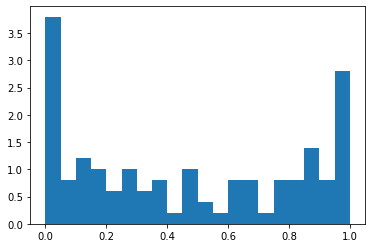

In [48]:
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import numpy as np

model = MLPClassifier(hidden_layer_sizes=200, max_iter=200).fit(train_data, train_labels)
predictions = model.predict(test_data)
predictions

# Correlation checking
big_corr = []
for m in range(1):
    for n in range(10):
        corr = []
        for i in range(10):
            model = MLPClassifier(hidden_layer_sizes=200, max_iter=200).fit(train_data, train_labels)
            predictions1 = model.predict(test_data)
            model = MLPClassifier(hidden_layer_sizes=200, max_iter=200).fit(train_data, train_labels)
            predictions2 = model.predict(test_data)
            sum1 = 0
            for j in range(len(predictions1)):
                sum1 = sum1 + 1 if predictions1[j] == predictions2[j] else sum1

            sum1 /= len(predictions1)
#            corr.append(sum1)
            big_corr.append(sum1)
            print(f"Trial {m*100 + n*10 + i + 1}: {sum1}")

#        avg = sum(corr) / len(corr)
#        print(avg)
#        big_corr.append(avg)
#        corr.clear()
#    print(f"Overall correlation average: {sum(big_corr)/len(big_corr)}")
#    big_corr.clear()


plt.hist(big_corr, density=True, bins=20)




In [49]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

xgb.set_config(verbosity=0)

train_df_year = train_DF[train_DF["Season"] == 2010]
X = train_df_year.drop("Season", axis=1)
X = X.drop(["Winner", "Team1ID", "Team2ID"], axis=1)
y = train_df_year["Winner"]
y = y.astype(int)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X.values)

X_proc = pd.DataFrame(scaled_X, index = X.index, columns = X.columns)

accuracy_scores = []
for i in range(20):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_proc, y, stratify=y)

    from sklearn.metrics import accuracy_score

    xgb_cl = xgb.XGBClassifier()

    # Model Fit
    xgb_cl.fit(X_train, y_train)

    # Model Prediction
    preds = xgb_cl.predict(X_test)

    # Accuracy Score
    accuracy_scores.append(accuracy_score(y_test, preds))
    
for i in range(len(accuracy_scores)):
    print(f"Trial {i}: {accuracy_scores[i]}")
print(f"Average accuracy: {sum(accuracy_scores)/len(accuracy_scores)}")


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encode

Trial 0: 0.625
Trial 1: 0.5625
Trial 2: 0.75
Trial 3: 0.6875
Trial 4: 0.5
Trial 5: 0.5625
Trial 6: 0.8125
Trial 7: 0.625
Trial 8: 0.6875
Trial 9: 0.6875
Trial 10: 0.625
Trial 11: 0.6875
Trial 12: 0.6875
Trial 13: 0.8125
Trial 14: 0.75
Trial 15: 0.9375
Trial 16: 0.5625
Trial 17: 0.6875
Trial 18: 0.5625
Trial 19: 0.75
Average accuracy: 0.678125
